# **Lisbon's Housing Prices: A Predictive Model**


# **1.   Import Data**

**1.1. Import Libraries and Documents**

In [1]:
!pip install langchain
!pip install langchain_experimental
!pip install langchain_openai
!pip install python-dotenv
!pip install google-colab
!pip install lxml
!pip install requests
!pip install requests-html
!pip install bs4
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.5/973.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
from langchain.agents.agent_types import AgentType
from dotenv import load_dotenv

In [3]:
from google.colab import userdata
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

**1.2. Import and integrate data**

In [86]:
all_data = pd.DataFrame()

In [87]:
from zipfile import ZipFile
file_name = "/content/Idealista_Data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [88]:
data_folder = "Idealista_Data"

In [89]:
files =  os.listdir(data_folder)
files

['oeiras.csv',
 'lisboa_p41-50.csv',
 'lisboa_p151-160.csv',
 'lisboa_p61-70.csv',
 'amadora.csv',
 'VF_Xira.csv',
 'lisboa_p91-100.csv',
 'lisboa_p81-90.csv',
 'lisboa_p31-40.csv',
 'loures.csv',
 'cascais.csv',
 'lisboa_p11-19.csv',
 'odivelas.csv',
 'lisboa_p111-120.csv',
 'lisboa_p20-30.csv',
 'lisboa_p141-150.csv',
 'lisboa_p101-110.csv',
 'lisboa_p71-80.csv',
 'lisboa_p171-176.csv',
 'lisboa_p121-130.csv',
 'lisboa_p1-10.csv',
 'lisboa_p131-140.csv',
 'lisboa_p51-60.csv',
 'lisboa_p161-170.csv']

In [90]:
city_mapping = {
    'oeiras': 'Oeiras',
    'lisboa': 'Lisboa',
    'amadora': 'Amadora',
    'VF_Xira': 'Vila Franca de Xira',
    'loures': 'Loures',
    'cascais': 'Cascais',
    'odivelas': 'Odivelas'
}

for file in files:
    path = os.path.join(data_folder, file)
    df = pd.read_csv(path)

    #city based on the filename
    for key in city_mapping:
        if key in file:
            city = city_mapping[key]
            break
    else:
        city = 'Unknown'

    df['city'] = city

    all_data = pd.concat([all_data, df])

all_data.head()

,propertyCode,thumbnail,externalReference,numPhotos,price,priceInfo,propertyType,operation,size,rooms,...,topNewDevelopment,topPlus,floor,description,hasLift,parkingSpace,newDevelopmentFinished,highlight,city,neighborhood
0,33418137,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,124021034-550,19,890000.0,{'price': {'amount': 890000.0}},flat,sale,271.0,4,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,NaN
1,33418145,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,124021217-6,17,270000.0,{'price': {'amount': 270000.0}},flat,sale,84.0,3,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,NaN
2,33418130,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,124401142-22,26,885000.0,{'price': {'amount': 885000.0}},chalet,sale,216.0,3,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,NaN
3,33417991,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,APTPP121,20,647521.0,{'price': {'amount': 647521.0}},flat,sale,109.0,2,...,False,False,1,Apartamento de 2 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras,NaN
4,33417866,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,APTPP123,20,751275.0,{'price': {'amount': 751275.0}},flat,sale,123.0,3,...,False,False,1,Apartamento de 3 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras,NaN


In [91]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17800 entries, 0 to 499
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            17800 non-null  int64  
 1   thumbnail               17796 non-null  object 
 2   externalReference       16433 non-null  object 
 3   numPhotos               17800 non-null  int64  
 4   price                   17800 non-null  float64
 5   priceInfo               17800 non-null  object 
 6   propertyType            17800 non-null  object 
 7   operation               17800 non-null  object 
 8   size                    17800 non-null  float64
 9   rooms                   17800 non-null  int64  
 10  bathrooms               17800 non-null  int64  
 11  address                 17800 non-null  object 
 12  province                17800 non-null  object 
 13  municipality            17800 non-null  object 
 14  district                14754 non-null  objec

In [92]:
all_data['city'].value_counts()

city
Lisboa                 8800
Cascais                3600
Oeiras                 1500
Loures                 1300
Amadora                 900
Vila Franca de Xira     850
Odivelas                850
Name: count, dtype: int64

**1.3. Set Index**

In [93]:
all_data.set_index("propertyCode", inplace=True)

**1.4. Check for duplicates**

In [94]:
all_data[all_data.duplicated()]

,thumbnail,externalReference,numPhotos,price,priceInfo,propertyType,operation,size,rooms,bathrooms,...,topNewDevelopment,topPlus,floor,description,hasLift,parkingSpace,newDevelopmentFinished,highlight,city,neighborhood
propertyCode,,,,,,,,,,,,,,,,,,,,,
33418137,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,124021034-550,19,890000.0,{'price': {'amount': 890000.0}},flat,sale,271.0,4,2,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,NaN
33418145,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,124021217-6,17,270000.0,{'price': {'amount': 270000.0}},flat,sale,84.0,3,2,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,NaN
33418130,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,124401142-22,26,885000.0,{'price': {'amount': 885000.0}},chalet,sale,216.0,3,4,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,NaN
33417991,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,APTPP121,20,647521.0,{'price': {'amount': 647521.0}},flat,sale,109.0,2,3,...,False,False,1,Apartamento de 2 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras,NaN
33417866,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,APTPP123,20,751275.0,{'price': {'amount': 751275.0}},flat,sale,123.0,3,3,...,False,False,1,Apartamento de 3 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33405826,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,1208-4416,14,190000.0,{'price': {'amount': 190000.0}},flat,sale,42.0,1,1,...,False,False,NaN,Apartamento de 1 dormitorio más otro dormitori...,NaN,NaN,NaN,NaN,Lisboa,NaN
33405816,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,1208-4269,15,695000.0,{'price': {'amount': 695000.0}},flat,sale,78.0,1,1,...,False,False,2,NaN,NaN,NaN,NaN,NaN,Lisboa,NaN
33405811,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,1208-4514,30,625000.0,{'price': {'amount': 625000.0}},flat,sale,177.0,3,3,...,False,False,NaN,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN,Lisboa,NaN


In [95]:
all_data.drop_duplicates(inplace = True)

In [96]:
len(all_data.index.unique())

17363

In [97]:
all_data[all_data.index.duplicated()]

,thumbnail,externalReference,numPhotos,price,priceInfo,propertyType,operation,size,rooms,bathrooms,...,topNewDevelopment,topPlus,floor,description,hasLift,parkingSpace,newDevelopmentFinished,highlight,city,neighborhood
propertyCode,,,,,,,,,,,,,,,,,,,,,
32796035,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,PROP-028664,33,450000.0,{'price': {'amount': 450000.0}},flat,sale,70.0,1,1,...,False,False,bj,Apartamento de 2 habitaciones con patio de 30 ...,False,NaN,NaN,NaN,Lisboa,NaN
33405813,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,1208-4642,39,625000.0,{'price': {'amount': 625000.0}},flat,sale,142.0,3,3,...,False,False,NaN,"Apartamento T4 de origen, actualmente transfor...",NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN,Lisboa,NaN
33405810,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,1208-4801,23,299000.0,{'price': {'amount': 299000.0}},flat,sale,65.0,2,2,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Lisboa,NaN


In [98]:
duplicates = all_data.index[all_data.index.duplicated()]
duplicated_df = all_data.loc[duplicates]
duplicated_df

,thumbnail,externalReference,numPhotos,price,priceInfo,propertyType,operation,size,rooms,bathrooms,...,topNewDevelopment,topPlus,floor,description,hasLift,parkingSpace,newDevelopmentFinished,highlight,city,neighborhood
propertyCode,,,,,,,,,,,,,,,,,,,,,
32796035,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,PROP-028664,33,450000.0,{'price': {'amount': 450000.0}},flat,sale,70.0,1,1,...,False,False,bj,Apartamento de 2 habitaciones con patio de 30 ...,False,NaN,NaN,NaN,Lisboa,NaN
32796035,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,PROP-028664,33,450000.0,{'price': {'amount': 450000.0}},flat,sale,70.0,1,1,...,False,False,bj,Apartamento de 2 habitaciones con patio de 30 ...,False,NaN,NaN,NaN,Lisboa,NaN
33405813,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,1208-4642,39,625000.0,{'price': {'amount': 625000.0}},flat,sale,142.0,3,3,...,False,False,6,"Apartamento T4 de origen, actualmente transfor...",True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN,Lisboa,NaN
33405813,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,1208-4642,39,625000.0,{'price': {'amount': 625000.0}},flat,sale,142.0,3,3,...,False,False,NaN,"Apartamento T4 de origen, actualmente transfor...",NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN,Lisboa,NaN
33405810,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,1208-4801,23,299000.0,{'price': {'amount': 299000.0}},flat,sale,65.0,2,2,...,False,False,bj,NaN,False,NaN,NaN,NaN,Lisboa,NaN
33405810,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,1208-4801,23,299000.0,{'price': {'amount': 299000.0}},flat,sale,65.0,2,2,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Lisboa,NaN


# **2.   Explore Data**

**2.1. Basic Exploration**

In [99]:
all_data.describe(include='all')

,thumbnail,externalReference,numPhotos,price,priceInfo,propertyType,operation,size,rooms,bathrooms,...,topNewDevelopment,topPlus,floor,description,hasLift,parkingSpace,newDevelopmentFinished,highlight,city,neighborhood
count,17362,16042,17366.000000,1.736600e+04,17366,17366,17366,17366.000000,17366.000000,17366.00000,...,17366,17366,10142,8897,11094,6116,2189,1854,17366,2332
unique,16974,15321,NaN,NaN,2284,6,1,NaN,NaN,NaN,...,1,1,31,8451,2,11,2,2,7,24
top,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,BLO_520_A,NaN,NaN,{'price': {'amount': 399900.0}},flat,sale,NaN,NaN,NaN,...,False,False,1,"Bienvenido a Élou, el condominio privado que t...",True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,{'groupDescription': 'Top'},Lisboa,Centro do Estoril
freq,37,13,NaN,NaN,219,13251,17366,NaN,NaN,NaN,...,17366,17366,2212,37,7482,6105,1997,1085,8674,273
mean,NaN,NaN,27.317920,8.012905e+05,NaN,NaN,NaN,158.396672,2.765461,2.27122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,14.505346,8.928867e+05,NaN,NaN,NaN,242.080659,1.521735,1.38630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,3.200000e+04,NaN,NaN,NaN,17.000000,0.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,17.000000,3.299000e+05,NaN,NaN,NaN,78.000000,2.000000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,25.000000,5.250000e+05,NaN,NaN,NaN,117.000000,3.000000,2.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,34.000000,8.900000e+05,NaN,NaN,NaN,187.000000,3.000000,3.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
all_data.columns

Index(['thumbnail', 'externalReference', 'numPhotos', 'price', 'priceInfo',
       'propertyType', 'operation', 'size', 'rooms', 'bathrooms', 'address',
       'province', 'municipality', 'district', 'country', 'latitude',
       'longitude', 'showAddress', 'url', 'hasVideo', 'status',
       'newDevelopment', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'topNewDevelopment',
       'topPlus', 'floor', 'description', 'hasLift', 'parkingSpace',
       'newDevelopmentFinished', 'highlight', 'city', 'neighborhood'],
      dtype='object')

In [101]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17366 entries, 33418137 to 32997432
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   thumbnail               17362 non-null  object 
 1   externalReference       16042 non-null  object 
 2   numPhotos               17366 non-null  int64  
 3   price                   17366 non-null  float64
 4   priceInfo               17366 non-null  object 
 5   propertyType            17366 non-null  object 
 6   operation               17366 non-null  object 
 7   size                    17366 non-null  float64
 8   rooms                   17366 non-null  int64  
 9   bathrooms               17366 non-null  int64  
 10  address                 17366 non-null  object 
 11  province                17366 non-null  object 
 12  municipality            17366 non-null  object 
 13  district                14465 non-null  object 
 14  country                 17366 non

**2.2 Data exploration**


In [102]:
all_data.head()

,thumbnail,externalReference,numPhotos,price,priceInfo,propertyType,operation,size,rooms,bathrooms,...,topNewDevelopment,topPlus,floor,description,hasLift,parkingSpace,newDevelopmentFinished,highlight,city,neighborhood
propertyCode,,,,,,,,,,,,,,,,,,,,,
33418137,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,124021034-550,19,890000.0,{'price': {'amount': 890000.0}},flat,sale,271.0,4,2,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,NaN
33418145,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,124021217-6,17,270000.0,{'price': {'amount': 270000.0}},flat,sale,84.0,3,2,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,NaN
33418130,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,124401142-22,26,885000.0,{'price': {'amount': 885000.0}},chalet,sale,216.0,3,4,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,NaN
33417991,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,APTPP121,20,647521.0,{'price': {'amount': 647521.0}},flat,sale,109.0,2,3,...,False,False,1,Apartamento de 2 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras,NaN
33417866,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,APTPP123,20,751275.0,{'price': {'amount': 751275.0}},flat,sale,123.0,3,3,...,False,False,1,Apartamento de 3 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras,NaN


In [103]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17366 entries, 33418137 to 32997432
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   thumbnail               17362 non-null  object 
 1   externalReference       16042 non-null  object 
 2   numPhotos               17366 non-null  int64  
 3   price                   17366 non-null  float64
 4   priceInfo               17366 non-null  object 
 5   propertyType            17366 non-null  object 
 6   operation               17366 non-null  object 
 7   size                    17366 non-null  float64
 8   rooms                   17366 non-null  int64  
 9   bathrooms               17366 non-null  int64  
 10  address                 17366 non-null  object 
 11  province                17366 non-null  object 
 12  municipality            17366 non-null  object 
 13  district                14465 non-null  object 
 14  country                 17366 non

In [104]:
all_data.describe()

,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea
count,17366.000000,1.736600e+04,17366.000000,17366.000000,17366.00000,17366.000000,17366.000000,17366.000000
mean,27.317920,8.012905e+05,158.396672,2.765461,2.27122,38.743777,-9.210916,5148.545894
std,14.505346,8.928867e+05,242.080659,1.521735,1.38630,0.050913,0.106858,2575.859627
min,0.000000,3.200000e+04,17.000000,0.000000,0.00000,38.678209,-9.481390,18.000000
25%,17.000000,3.299000e+05,78.000000,2.000000,1.00000,38.709819,-9.245417,3269.250000
50%,25.000000,5.250000e+05,117.000000,3.000000,2.00000,38.727983,-9.170288,4655.000000
75%,34.000000,8.900000e+05,187.000000,3.000000,3.00000,38.757366,-9.141584,6480.750000
max,178.000000,1.500000e+07,22000.000000,45.000000,38.00000,39.010520,-8.951977,35714.000000


In [105]:
all_data.isnull().sum()

thumbnail                     4
externalReference          1324
numPhotos                     0
price                         0
priceInfo                     0
propertyType                  0
operation                     0
size                          0
rooms                         0
bathrooms                     0
address                       0
province                      0
municipality                  0
district                   2901
country                       0
latitude                      0
longitude                     0
showAddress                   0
url                           0
hasVideo                      0
status                        0
newDevelopment                0
priceByArea                   0
detailedType                  0
suggestedTexts                0
hasPlan                       0
has3DTour                     0
has360                        0
hasStaging                    0
topNewDevelopment             0
topPlus                       0
floor   

# **3.   Preprocess Data - cleaning**

**3.1. First look into the variables**

In [106]:
print(all_data.iloc[0:5,24])

propertyCode
33418137    {'subtitle': 'Algés - Linda-a-Velha - Cruz Que...
33418145    {'subtitle': 'Carnaxide e Queijas, Oeiras', 't...
33418130    {'subtitle': 'Porto Salvo, Oeiras', 'title': '...
33417991    {'subtitle': 'Oeiras e São Julião da Barra - P...
33417866    {'subtitle': 'Oeiras e São Julião da Barra - P...
Name: suggestedTexts, dtype: object


In [107]:
#iterate to check each column and do a first filtering
column = 37 #number of column
all_data.iloc[:1,column]
#df_test.loc[:10,['neighborhood', 'province', 'municipality', 'district']]
#df_test.iloc[0,column]

propertyCode
33418137    Oeiras
Name: city, dtype: object

In [166]:
print(f'{all_data.columns[0]}: thumbnail - first picture - no relevant information - delete column')
print(f'{all_data.columns[1]}: externalReference - no relevant information - delete')
print(f'{all_data.columns[2]}: numphotos - filter for too few pictures')
print(f'{all_data.columns[3]}: price - turn float to integer')
print(f'{all_data.columns[4]}: priceInfo - delete column: repeating info of column-price')
print(f'{all_data.columns[5]}: propertyType - keep')
print(f'{all_data.columns[6]}: operation - delete (all are "sale")')
print(f'{all_data.columns[7]}: size - turn float to integer')
print(f'{all_data.columns[8]}: rooms - keep')
print(f'{all_data.columns[9]}: bathrooms - keep')
print(f'{all_data.columns[10]}: adress - delete')
print(f'{all_data.columns[11]}: province - delete - all in Lisbon')
print(f'{all_data.columns[12]}: municipality - freguesia, keep')
print(f'{all_data.columns[13]}: district - vizinhança, too specific for retrieving any information, delete')
print(f'{all_data.columns[14]}: country - always the same - delete')
print(f'{all_data.columns[15]}: latitute - keep')
print(f'{all_data.columns[16]}: longitude - keep')
print(f'{all_data.columns[17]}: showAdress - not relevant, delete')
print(f'{all_data.columns[18]}: url - cannot give relevant information, delete')
print(f'{all_data.columns[19]}: hasVideo - analyze which posts has video and see if there is a correlation with the price')
print(f'{all_data.columns[20]}: status - keep' )
print(f'{all_data.columns[21]}: newDevelopment - keep')
print(f'{all_data.columns[22]}: priceByArea - redundant, data leakage, delete')
print(f'{all_data.columns[23]}: detailType - delete, subtipology in column propertyType')
print(f'{all_data.columns[24]}: suggestedTexts - delete' )
print(f'{all_data.columns[25]}: hasPlan - analyse, possibly will be necessary to delete before the model' )
print(f'{all_data.columns[26]}: has3DTour - analyse, possibly will be necessary to delete before the model')
print(f'{all_data.columns[27]}: has360 - analyse, possibly will be necessary to delete before the model')
print(f'{all_data.columns[28]}: hasStaging - no relevant or explained information - delete')
print(f'{all_data.columns[29]}: topNewDevelopment - no relevant or explained information - delete')
print(f'{all_data.columns[30]}: topPlus - no relevant or explained information - delete')
print(f'{all_data.columns[31]}: floor - turn object to number , identify other values')
print(f'{all_data.columns[32]}: description - filter with LLM: to validate location and to identify ruins that are not habitable')
print(f'{all_data.columns[33]}: haslift - keep')
print(f'{all_data.columns[34]}: parkinSpace - keep, analyse and clean')
print(f'{all_data.columns[35]}: newDevelopmentFinished - keep ')
print(f'{all_data.columns[36]}: highlight - analyse, possibly will be necessary to delete before the model')
print(f'{all_data.columns[37]}: city - keep - new row created')
print(f'{all_data.columns[38]}: neighborhood - delete, too many NaNs , too specific')

thumbnail: thumbnail - first picture - no relevant information - delete column
externalReference: externalReference - no relevant information - delete
numPhotos: numphotos - filter for too few pictures
price: price - turn float to integer
priceInfo: priceInfo - delete column: repeating info of column-price
propertyType: propertyType - keep
operation: operation - delete (all are "sale")
size: size - turn float to integer
rooms: rooms - keep
bathrooms: bathrooms - keep
address: adress - delete
province: province - delete - all in Lisbon
municipality: municipality - freguesia, keep
district: district - vizinhança, too specific for retrieving any information, delete
country: country - always the same - delete
latitude: latitute - keep
longitude: longitude - keep
showAddress: showAdress - not relevant, delete
url: url - cannot give relevant information, delete
hasVideo: hasVideo - analyze which posts has video and see if there is a correlation with the price
status: status - keep
newDevelop

**3.2. Drop variables**

The variables that does not give any extra information are droped, some are redundant like the address, or don't offer anything new like operation (it's always sale).

In [109]:
data_clean1 = all_data.drop(columns=['neighborhood', 'topPlus', 'topNewDevelopment', 'url', 'showAddress', 'address' ,'country', 'district', 'province', 'operation', 'priceInfo', 'externalReference' , 'thumbnail' , 'priceByArea' , 'detailedType' , 'suggestedTexts'])
data_clean1

,numPhotos,price,propertyType,size,rooms,bathrooms,municipality,latitude,longitude,hasVideo,...,has3DTour,has360,hasStaging,floor,description,hasLift,parkingSpace,newDevelopmentFinished,highlight,city
propertyCode,,,,,,,,,,,,,,,,,,,,,
33418137,19,890000.0,flat,271.0,4,2,Algés - Linda-a-Velha - Cruz Quebrada - Dafundo,38.710262,-9.223349,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras
33418145,17,270000.0,flat,84.0,3,2,Carnaxide e Queijas,38.726605,-9.242783,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras
33418130,26,885000.0,chalet,216.0,3,4,Porto Salvo,38.720033,-9.308282,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras
33417991,20,647521.0,flat,109.0,2,3,Oeiras e São Julião da Barra - Paço de Arcos -...,38.704319,-9.309618,False,...,False,False,False,1,Apartamento de 2 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras
33417866,20,751275.0,flat,123.0,3,3,Oeiras e São Julião da Barra - Paço de Arcos -...,38.706871,-9.308901,False,...,False,False,False,1,Apartamento de 3 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32998494,25,840000.0,chalet,214.0,3,2,Ajuda,38.707623,-9.199300,True,...,False,False,False,NaN,"Casa adosada ubicada en Ajuda, Lisboa.Construi...",NaN,NaN,NaN,NaN,Lisboa
32997993,44,890000.0,flat,199.0,4,3,Parque das Nações,38.755524,-9.098039,False,...,False,False,False,NaN,Piso de 4 dormitorios en Parque das Nações con...,NaN,NaN,NaN,NaN,Lisboa
32997808,34,1620000.0,flat,274.0,3,4,Avenidas Novas,38.731422,-9.150846,False,...,False,False,False,NaN,En una de las zonas más deseadas de la Ciudad ...,NaN,NaN,NaN,NaN,Lisboa


**3.3. Data type checking**

All the data with numeric type is set to integer to keep it consistent

In [110]:
data_clean1[['numPhotos', 'price', 'size', 'rooms', 'bathrooms']] = all_data[['numPhotos', 'price', 'size', 'rooms', 'bathrooms']].astype(int)

In [111]:
data_clean1[['numPhotos', 'price', 'size', 'rooms', 'bathrooms']].dtypes

numPhotos    int64
price        int64
size         int64
rooms        int64
bathrooms    int64
dtype: object

**3.4. Validate the authenticity of the house announcements**

After navigating to the Idealista web site we came to the conclusion that a low amount of photos is associated to low quality of the listings or even the veracity of those listings, so we decide to drop those below 5. Definitely we could've investigated further and trie other numbers but we are satisfied with this number.

In [112]:
len(data_clean1[data_clean1["numPhotos"] < 5])

241

In [113]:
data_clean2 = data_clean1[data_clean1["numPhotos"] >= 5]
data_clean2

,numPhotos,price,propertyType,size,rooms,bathrooms,municipality,latitude,longitude,hasVideo,...,has3DTour,has360,hasStaging,floor,description,hasLift,parkingSpace,newDevelopmentFinished,highlight,city
propertyCode,,,,,,,,,,,,,,,,,,,,,
33418137,19,890000,flat,271,4,2,Algés - Linda-a-Velha - Cruz Quebrada - Dafundo,38.710262,-9.223349,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras
33418145,17,270000,flat,84,3,2,Carnaxide e Queijas,38.726605,-9.242783,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras
33418130,26,885000,chalet,216,3,4,Porto Salvo,38.720033,-9.308282,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras
33417991,20,647521,flat,109,2,3,Oeiras e São Julião da Barra - Paço de Arcos -...,38.704319,-9.309618,False,...,False,False,False,1,Apartamento de 2 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras
33417866,20,751275,flat,123,3,3,Oeiras e São Julião da Barra - Paço de Arcos -...,38.706871,-9.308901,False,...,False,False,False,1,Apartamento de 3 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32998494,25,840000,chalet,214,3,2,Ajuda,38.707623,-9.199300,True,...,False,False,False,NaN,"Casa adosada ubicada en Ajuda, Lisboa.Construi...",NaN,NaN,NaN,NaN,Lisboa
32997993,44,890000,flat,199,4,3,Parque das Nações,38.755524,-9.098039,False,...,False,False,False,NaN,Piso de 4 dormitorios en Parque das Nações con...,NaN,NaN,NaN,NaN,Lisboa
32997808,34,1620000,flat,274,3,4,Avenidas Novas,38.731422,-9.150846,False,...,False,False,False,NaN,En una de las zonas más deseadas de la Ciudad ...,NaN,NaN,NaN,NaN,Lisboa


**3.5. Variables newDevelopment**

In [114]:
data_clean2["newDevelopmentFinished"].value_counts()

newDevelopmentFinished
False    1979
True      192
Name: count, dtype: int64

In [115]:
data_clean2["newDevelopment"].value_counts()

newDevelopment
False    14954
True      2171
Name: count, dtype: int64

In [116]:
contingency_table = pd.crosstab(data_clean2["newDevelopment"], data_clean2["newDevelopmentFinished"])
contingency_table_row_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
contingency_table_row_percent

newDevelopmentFinished,False,True
newDevelopment,,
True,91.156149,8.843851


From the newDevelopmentFinished (already finished renewed houses), they are all True in newDevelopment (all renewed houses), which is coherent. From all the houses that are being renwed (newDevelopment), about 91% are still in process, and 9% are already finished.
That means that are 3 types of houses in terms of renewing:
- Already renewed (2)
- In renovation (1)
- Not renewd*

It was created a new column to show this information and the original columns were droped

*In the status it is possible to see that there are 2 types of not renwed properties:

* Good (0)
* To renew (-1)

In a final analysis, all will be set in the house_status column with:
- Already renewed (2)
- In renovation (1)
* Good (0)
* To renew (-1)

In [117]:
house_status = []

for index, row in data_clean2.iterrows():
    if row['newDevelopmentFinished'] == True:
        house_status.append(2)  # Already renewed
    elif row['newDevelopment'] == True:
        house_status.append(1)  # In renovation
    else:
        house_status.append(0)  # Not renewed

data_clean2['house_status'] = house_status

data_clean2

<ipython-input-117-e244e12ac28c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean2['house_status'] = house_status


,numPhotos,price,propertyType,size,rooms,bathrooms,municipality,latitude,longitude,hasVideo,...,has360,hasStaging,floor,description,hasLift,parkingSpace,newDevelopmentFinished,highlight,city,house_status
propertyCode,,,,,,,,,,,,,,,,,,,,,
33418137,19,890000,flat,271,4,2,Algés - Linda-a-Velha - Cruz Quebrada - Dafundo,38.710262,-9.223349,False,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,0
33418145,17,270000,flat,84,3,2,Carnaxide e Queijas,38.726605,-9.242783,False,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,0
33418130,26,885000,chalet,216,3,4,Porto Salvo,38.720033,-9.308282,False,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,Oeiras,0
33417991,20,647521,flat,109,2,3,Oeiras e São Julião da Barra - Paço de Arcos -...,38.704319,-9.309618,False,...,False,False,1,Apartamento de 2 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras,1
33417866,20,751275,flat,123,3,3,Oeiras e São Julião da Barra - Paço de Arcos -...,38.706871,-9.308901,False,...,False,False,1,Apartamento de 3 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",False,NaN,Oeiras,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32998494,25,840000,chalet,214,3,2,Ajuda,38.707623,-9.199300,True,...,False,False,NaN,"Casa adosada ubicada en Ajuda, Lisboa.Construi...",NaN,NaN,NaN,NaN,Lisboa,0
32997993,44,890000,flat,199,4,3,Parque das Nações,38.755524,-9.098039,False,...,False,False,NaN,Piso de 4 dormitorios en Parque das Nações con...,NaN,NaN,NaN,NaN,Lisboa,0
32997808,34,1620000,flat,274,3,4,Avenidas Novas,38.731422,-9.150846,False,...,False,False,NaN,En una de las zonas más deseadas de la Ciudad ...,NaN,NaN,NaN,NaN,Lisboa,0


In [118]:
data_clean2.drop(columns=['newDevelopment', 'newDevelopmentFinished'], inplace=True)

<ipython-input-118-18889d417323>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean2.drop(columns=['newDevelopment', 'newDevelopmentFinished'], inplace=True)


In [119]:
data_clean2['house_status'].value_counts()

house_status
0    14954
1     1979
2      192
Name: count, dtype: int64

In [120]:
len(data_clean2[data_clean2['house_status'] == 2])

192

In [121]:
data_clean2['status'].value_counts()

status
good              14377
newdevelopment     2171
renew               577
Name: count, dtype: int64

Final table - house_status

In [122]:
data_clean2.loc[data_clean2['status'] == 'renew', 'house_status'] = -1

data_clean2

,numPhotos,price,propertyType,size,rooms,bathrooms,municipality,latitude,longitude,hasVideo,...,has3DTour,has360,hasStaging,floor,description,hasLift,parkingSpace,highlight,city,house_status
propertyCode,,,,,,,,,,,,,,,,,,,,,
33418137,19,890000,flat,271,4,2,Algés - Linda-a-Velha - Cruz Quebrada - Dafundo,38.710262,-9.223349,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Oeiras,0
33418145,17,270000,flat,84,3,2,Carnaxide e Queijas,38.726605,-9.242783,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Oeiras,0
33418130,26,885000,chalet,216,3,4,Porto Salvo,38.720033,-9.308282,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Oeiras,0
33417991,20,647521,flat,109,2,3,Oeiras e São Julião da Barra - Paço de Arcos -...,38.704319,-9.309618,False,...,False,False,False,1,Apartamento de 2 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,Oeiras,1
33417866,20,751275,flat,123,3,3,Oeiras e São Julião da Barra - Paço de Arcos -...,38.706871,-9.308901,False,...,False,False,False,1,Apartamento de 3 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,Oeiras,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32998494,25,840000,chalet,214,3,2,Ajuda,38.707623,-9.199300,True,...,False,False,False,NaN,"Casa adosada ubicada en Ajuda, Lisboa.Construi...",NaN,NaN,NaN,Lisboa,0
32997993,44,890000,flat,199,4,3,Parque das Nações,38.755524,-9.098039,False,...,False,False,False,NaN,Piso de 4 dormitorios en Parque das Nações con...,NaN,NaN,NaN,Lisboa,0
32997808,34,1620000,flat,274,3,4,Avenidas Novas,38.731422,-9.150846,False,...,False,False,False,NaN,En una de las zonas más deseadas de la Ciudad ...,NaN,NaN,NaN,Lisboa,0


In [123]:
data_clean2.drop(columns=['status'], inplace=True)

<ipython-input-123-6be1efffd740>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean2.drop(columns=['status'], inplace=True)


In [124]:
data_clean2['house_status'].value_counts()

house_status
 0    14377
 1     1979
-1      577
 2      192
Name: count, dtype: int64

**3.6. Variable floor**

This variable is composed by numbers of the floors and for three diferent strings: 'bj' refering to grounfloor, 'st' to  and 'ss' to semi-basement


*   'bj' was set to 0
* 'st' was set to the mean of the values plus one
* 'ss' was set to -1

In [125]:
data_clean2["floor"].value_counts()

floor
1     2179
2     1886
3     1614
bj    1357
4      880
5      582
6      444
7      292
8      182
st     155
9      145
10      83
-1      48
11      40
12      33
15      25
14      21
ss      13
13      13
16      11
18       4
23       3
20       2
21       2
-2       2
25       1
33       1
22       1
17       1
34       1
24       1
Name: count, dtype: int64

In [126]:
data_clean2["floor"] = data_clean2["floor"].replace('bj', 0)

<ipython-input-126-8900df156e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean2["floor"] = data_clean2["floor"].replace('bj', 0)


In [127]:
data_clean2[data_clean2['floor'] == 'st'].head()

filtered_data = data_clean2[data_clean2['floor'] == 'st']

In [128]:
numeric_floor = pd.to_numeric(df['floor'], errors='coerce')
numeric_floor = numeric_floor.dropna()
data_clean3 = pd.DataFrame({'floor': numeric_floor})
data_clean3.median()

floor    3.0
dtype: float64

In [129]:
data_clean2["floor"] = data_clean2["floor"].replace('st', 4) #replace by median plus 1

<ipython-input-129-fb294fa410e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean2["floor"] = data_clean2["floor"].replace('st', 4) #replace by median plus 1


In [130]:
data_clean2.loc[data_clean2['floor'] == 'ss', 'description']

propertyCode
33357980                                                  NaN
33356886    Apartamento de 5 dormitorios y 5 baños en vent...
33352535    Se vende apartamento T3 remodelado con terraza...
33373812    Apartamento de 1 dormitorio convertido en 3 Co...
33168925    Apartamento de 3 dormitorios completamente rem...
33360281                                                  NaN
33262600    Apartamento de 2 habitaciones, situado en Lumi...
33260529    Descubra este encantador apartamento de 1 dorm...
33269341                                                  NaN
33100344    Piso de 2 dormitorios y 1 baño con terraza tot...
33243562    Apartamento de 2 dormitorios con terraza y tra...
33197554                                                  NaN
33016678    ¡Atención inversionistas! Si buscan un inmuebl...
Name: description, dtype: object

In [131]:
data_clean2["floor"] = data_clean2["floor"].replace('ss', -1) #replace by -1

<ipython-input-131-a1c1662cb245>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean2["floor"] = data_clean2["floor"].replace('ss', -1) #replace by -1


In [132]:
data_clean2["floor"].value_counts()

floor
1     2179
2     1886
3     1614
0     1357
4      880
5      582
6      444
7      292
8      182
4      155
9      145
10      83
-1      48
11      40
12      33
15      25
14      21
-1      13
13      13
16      11
18       4
23       3
20       2
21       2
-2       2
25       1
33       1
22       1
17       1
34       1
24       1
Name: count, dtype: int64

In [133]:
#pd.set_option('display.max_colwidth', None)

#filtered_data['description']

pd.set_option('display.max_colwidth', 50)

filtered_data['description']

propertyCode
33409678    Fruto de una remodelación inspirada que alteró...
33409181    Agradable apartamento con jardín privado Excel...
33395384                                                  NaN
33376754                                                  NaN
33306903    Descubra su oasis urbano en el corazón del cen...
                                  ...                        
33308212    2 Departamento de 1 dormitorio con una superfi...
33046461    Te presentamos este maravilloso apartamento, t...
33037364    Encantador apartamento en venta en el emblemát...
33035177                                                  NaN
33017036    Apartamento de 1 dormitorio para construcción,...
Name: description, Length: 155, dtype: object

**3.7. Outliers values**

The boxplot shows some outliers in the highest values of house prices, by analysing this data, the house prices seem realistic according to their caracthertics and location, so it was decided to mantain this values.

However, despite no lower values are showed in the boxplot, there are values from 49.000€ that by analysis are ruins, houses without any conditions to live, or apparently fake publications. By reading some documentation it was decided to drop all values lower than 60.000€.

<Axes: xlabel='price'>

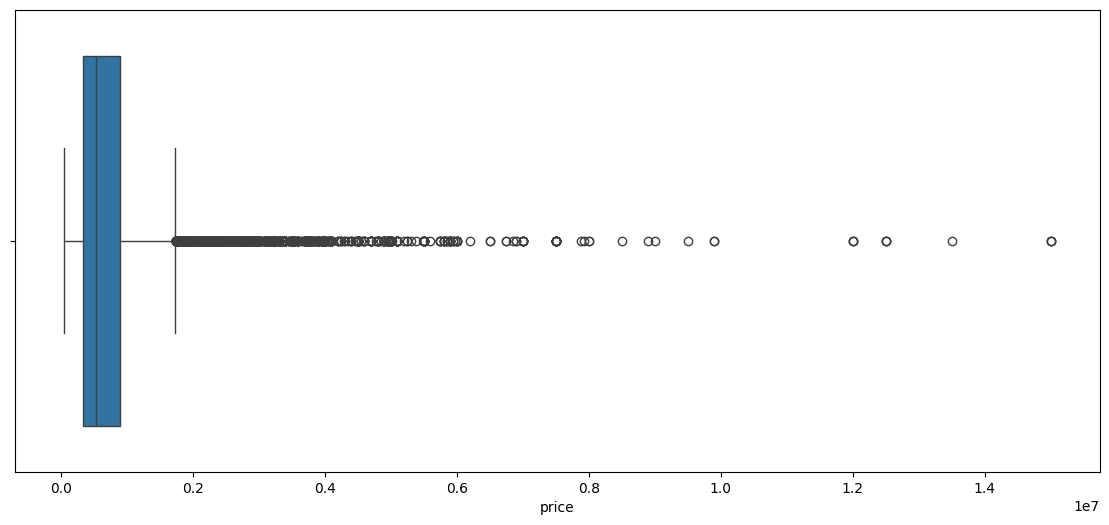

In [134]:
fig, (ax1) = plt.subplots(1, figsize = (14,6))
sns.boxplot(ax = ax1, data = data_clean2, x = 'price')

In [135]:
data_clean2['price'].describe().round(2)

count       17125.00
mean       803025.85
std        883951.13
min         49000.00
25%        330000.00
50%        530000.00
75%        890000.00
max      15000000.00
Name: price, dtype: float64

In [136]:
data_clean2[['numPhotos', 'price', 'size', 'rooms', 'bathrooms']].dtypes

numPhotos    int64
price        int64
size         int64
rooms        int64
bathrooms    int64
dtype: object

In [137]:
data_clean4 = data_clean2[data_clean2['price'] >= 60000]
data_clean4

,numPhotos,price,propertyType,size,rooms,bathrooms,municipality,latitude,longitude,hasVideo,...,has3DTour,has360,hasStaging,floor,description,hasLift,parkingSpace,highlight,city,house_status
propertyCode,,,,,,,,,,,,,,,,,,,,,
33418137,19,890000,flat,271,4,2,Algés - Linda-a-Velha - Cruz Quebrada - Dafundo,38.710262,-9.223349,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Oeiras,0
33418145,17,270000,flat,84,3,2,Carnaxide e Queijas,38.726605,-9.242783,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Oeiras,0
33418130,26,885000,chalet,216,3,4,Porto Salvo,38.720033,-9.308282,False,...,False,False,False,NaN,NaN,NaN,NaN,NaN,Oeiras,0
33417991,20,647521,flat,109,2,3,Oeiras e São Julião da Barra - Paço de Arcos -...,38.704319,-9.309618,False,...,False,False,False,1,Apartamento de 2 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,Oeiras,1
33417866,20,751275,flat,123,3,3,Oeiras e São Julião da Barra - Paço de Arcos -...,38.706871,-9.308901,False,...,False,False,False,1,Apartamento de 3 dormitorios insertado en la u...,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,Oeiras,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32998494,25,840000,chalet,214,3,2,Ajuda,38.707623,-9.199300,True,...,False,False,False,NaN,"Casa adosada ubicada en Ajuda, Lisboa.Construi...",NaN,NaN,NaN,Lisboa,0
32997993,44,890000,flat,199,4,3,Parque das Nações,38.755524,-9.098039,False,...,False,False,False,NaN,Piso de 4 dormitorios en Parque das Nações con...,NaN,NaN,NaN,Lisboa,0
32997808,34,1620000,flat,274,3,4,Avenidas Novas,38.731422,-9.150846,False,...,False,False,False,NaN,En una de las zonas más deseadas de la Ciudad ...,NaN,NaN,NaN,Lisboa,0


**3.8. Missing values**

The variables with missing values are:



*   'floor' - for the houses that are not apartments (flat, studio, penthouse or duplex), the value will be set to 0. The values that are missing from apartments, are going to be calculated through KNN Imputer, to minimize the biase
*   'description' - there is no way to fill this data, the data that it's already there is going to be used in future analysis
*   'hasLift' - it will be considered that the missing values don't have lift
*   'parkingSpace' - it will be considered that the missing values don't have parkingSpace - there are a few lines witht« parkingSpace but they are residual and some of them don't seem correct (for example price = 1€) so the values were set to 0 or 1
*   'highligh' - the missing values don't have highligh



In [138]:
missing_percentage = data_clean4.isnull().sum() / all_data.shape[0] * 100
missing_percentage

numPhotos        0.000000
price            0.000000
propertyType     0.000000
size             0.000000
rooms            0.000000
bathrooms        0.000000
municipality     0.000000
latitude         0.000000
longitude        0.000000
hasVideo         0.000000
hasPlan          0.000000
has3DTour        0.000000
has360           0.000000
hasStaging       0.000000
floor           40.896004
description     47.996084
hasLift         35.557987
parkingSpace    63.727974
highlight       87.953472
city             0.000000
house_status     0.000000
dtype: float64

*floor*

Houses - set floor to 0

In [139]:
data_clean4['propertyType'].value_counts()

propertyType
flat            13064
chalet           3124
duplex            448
studio            289
penthouse         156
countryHouse       42
Name: count, dtype: int64

In [140]:
data_clean4.query("propertyType == 'flat' | propertyType == 'studio' | propertyType == 'penthouse' | propertyType == 'duplex'")['floor'].isnull().sum() / data_clean4.shape[0] * 100

22.992466273433394

In [141]:
houses = data_clean4.query("propertyType == 'chalet' | propertyType == 'countryHouse' ")
houses['floor'].isnull().mean() * 100

99.96841440303221

In [142]:
data_clean4.loc[houses.index, 'floor'] = 0

Apartments - predicte a value with KNN Imputer

In [143]:
data_clean4['floor'].isna().sum()

3937

In [144]:
data_clean4['floor'] = pd.to_numeric(data_clean4['floor'], errors='coerce')

<ipython-input-144-3fa79c8900f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean4['floor'] = pd.to_numeric(data_clean4['floor'], errors='coerce')


In [145]:
data_clean4['floor'].describe()

count    13186.000000
mean         2.146595
std          2.609507
min         -2.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         34.000000
Name: floor, dtype: float64

In [146]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

floor_imputed = imputer.fit_transform(data_clean4[['floor']])

data_clean4['floor'] = floor_imputed

print(data_clean4['floor'].isna().sum())
print(data_clean4['floor'].value_counts())


0
floor
 0.000000     4521
 2.146595     3937
 1.000000     2179
 2.000000     1886
 3.000000     1614
 4.000000     1035
 5.000000      582
 6.000000      444
 7.000000      292
 8.000000      182
 9.000000      145
 10.000000      83
-1.000000       61
 11.000000      40
 12.000000      33
 15.000000      25
 14.000000      21
 13.000000      13
 16.000000      11
 18.000000       4
 23.000000       3
 20.000000       2
 21.000000       2
-2.000000        2
 25.000000       1
 33.000000       1
 22.000000       1
 17.000000       1
 34.000000       1
 24.000000       1
Name: count, dtype: int64


<ipython-input-146-11efd6fc74a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean4['floor'] = floor_imputed


In [147]:
data_clean4['floor'] = pd.to_numeric(data_clean4['floor'], errors='coerce').astype(int)

<ipython-input-147-5c8924c4879f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean4['floor'] = pd.to_numeric(data_clean4['floor'], errors='coerce').astype(int)


In [148]:
data_clean4['floor'].value_counts()

floor
 2     5823
 0     4521
 1     2179
 3     1614
 4     1035
 5      582
 6      444
 7      292
 8      182
 9      145
 10      83
-1       61
 11      40
 12      33
 15      25
 14      21
 13      13
 16      11
 18       4
 23       3
 20       2
 21       2
-2        2
 25       1
 33       1
 22       1
 17       1
 34       1
 24       1
Name: count, dtype: int64

*hasLift*
In this column we verified that the tendency was for the house with a lift to have a value but those that didn't have one had null values, because it was not an asset to be mentioned. So logically we decided to assume that every null value is a 'No' and filled them with a 0.

In [149]:
data_clean4['hasLift'].fillna(0, inplace=True)
data_clean4.loc[data_clean4['hasLift'] != 0, 'hasLift'] = 1

<ipython-input-149-b1b3eb0bc933>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean4['hasLift'].fillna(0, inplace=True)


In [150]:
data_clean4['hasLift'].value_counts()

hasLift
0    9716
1    7407
Name: count, dtype: int64

*parkingSpace*

Similar to the case above mentioned we assume that listing with null values don't bother to mention parking space since it's not an asset and filled them with 0.

In [151]:
data_clean4['parkingSpace'].fillna(0, inplace=True)
data_clean4.loc[data_clean4['parkingSpace'] != 0, 'parkingSpace'] = 1

<ipython-input-151-7ba63b24fe8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean4['parkingSpace'].fillna(0, inplace=True)


In [152]:
data_clean4['parkingSpace'].value_counts()

parkingSpace
0    11067
1     6056
Name: count, dtype: int64

*highligh*

This column follows in the footsteps of the previous two, so we believe that only the listing highlighted in the site are filled and the other one didn't receive that honor so ended up with null values, again we filled the with 0.

In [153]:
data_clean4['highlight'].value_counts()

highlight
{'groupDescription': 'Top'}          1083
{'groupDescription': 'Destacado'}     766
Name: count, dtype: int64

In [154]:
data_clean4['highlight'].fillna(0, inplace=True)
data_clean4.loc[data_clean4['highlight'] != 0, 'highlight'] = 1

<ipython-input-154-37bff8dde611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean4['highlight'].fillna(0, inplace=True)


Finally we verify that the only column with missing values is the description we tried a cool approach that can be seen later on with pandas dataframe agents to extract some information, but didn't find anything worthy of metion and decided to drop this column since it mostly recapitulates data from other columns and doesn't add much.


In [155]:
missing_percentage = data_clean4.isnull().sum() / all_data.shape[0] * 100
missing_percentage

numPhotos        0.000000
price            0.000000
propertyType     0.000000
size             0.000000
rooms            0.000000
bathrooms        0.000000
municipality     0.000000
latitude         0.000000
longitude        0.000000
hasVideo         0.000000
hasPlan          0.000000
has3DTour        0.000000
has360           0.000000
hasStaging       0.000000
floor            0.000000
description     47.996084
hasLift          0.000000
parkingSpace     0.000000
highlight        0.000000
city             0.000000
house_status     0.000000
dtype: float64

In [156]:
data_clean4.to_csv('data_clean4.csv', index=False)

In [157]:
data_clean4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17123 entries, 33418137 to 32997432
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   numPhotos     17123 non-null  int64  
 1   price         17123 non-null  int64  
 2   propertyType  17123 non-null  object 
 3   size          17123 non-null  int64  
 4   rooms         17123 non-null  int64  
 5   bathrooms     17123 non-null  int64  
 6   municipality  17123 non-null  object 
 7   latitude      17123 non-null  float64
 8   longitude     17123 non-null  float64
 9   hasVideo      17123 non-null  bool   
 10  hasPlan       17123 non-null  bool   
 11  has3DTour     17123 non-null  bool   
 12  has360        17123 non-null  bool   
 13  hasStaging    17123 non-null  bool   
 14  floor         17123 non-null  int64  
 15  description   8788 non-null   object 
 16  hasLift       17123 non-null  object 
 17  parkingSpace  17123 non-null  object 
 18  highlight     17123 n

#**Prepare data to the model**

There will be eliminated columns that are associated with the publishing (numPhotos, hasVideo, hasPlan, has3DTour, has360, hasStaging, highlight), description and location too specific variables (latitute, longitude, municipality)

In [158]:
data_clean4.drop(columns=['numPhotos', 'hasVideo', 'description', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'highlight', 'latitude', 'longitude', 'municipality'], inplace=True)

<ipython-input-158-ae8bfa8bce68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean4.drop(columns=['numPhotos', 'hasVideo', 'description', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'highlight', 'latitude', 'longitude', 'municipality'], inplace=True)


In [159]:
data_clean4["hasLift"].value_counts()

hasLift
0    9716
1    7407
Name: count, dtype: int64

In [160]:
data_clean4.to_csv('data_to_model2.csv', index=False)

#(Open AI dataframe agent)

The cool approach mentioned before, didn't work out this time but maybe next time it will. Either way was a great tool to learn. We will leave the code commented out since it bears no importance in our analysis but will leave here for future reference.

In [161]:
# data_clean2_obj = all_data.select_dtypes(include='object')
# data_clean2_obj.head()

In [162]:
# data_clean2_obj = data_clean2_obj[~data_clean2_obj["description"].isnull()]
# data_clean2_obj

In [163]:
# openai_api = userdata.get('OPENAI_API_KEY')

# agent = create_pandas_dataframe_agent(
#     ChatOpenAI(model_name='gpt-4', temperature=0, openai_api_key=openai_api),
#     data_clean2_obj,
#     agent_type=AgentType.OPENAI_FUNCTIONS,
#     verbose=True)

In [164]:
# agent.invoke("Which columns have information about the location of the house?")

In [165]:
# agent.invoke("Compare the columns that have information about the location of the house and the description column and give me a list of all the rows that have conflicting information - for example if in a description mentions that the house is located in Carcavelos but the address is Ruílhe, Braga. You should find these types of errors.")